In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [6]:

# Load dataset
df = pd.read_csv("diabetes.csv")

# Set seed and take random sample
np.random.seed(42)
sample_25 = df.sample(n=25, random_state=42)

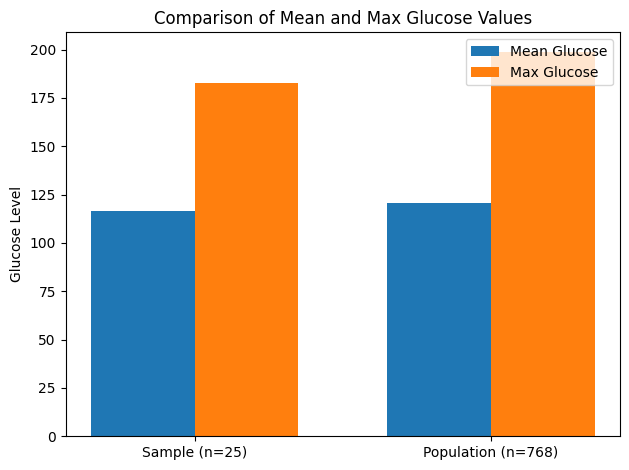

In [7]:
# Part (a) - Glucose statistics
sample_mean_glucose = sample_25["Glucose"].mean()
sample_max_glucose = sample_25["Glucose"].max()
population_mean_glucose = df["Glucose"].mean()
population_max_glucose = df["Glucose"].max()

labels = ["Sample (n=25)", "Population (n=768)"]
mean_values = [sample_mean_glucose, population_mean_glucose]
max_values = [sample_max_glucose, population_max_glucose]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, mean_values, width, label="Mean Glucose")
ax.bar(x + width/2, max_values, width, label="Max Glucose")
ax.set_ylabel("Glucose Level")
ax.set_title("Comparison of Mean and Max Glucose Values")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.savefig("part_a_glucose_comparison.png")
plt.show()

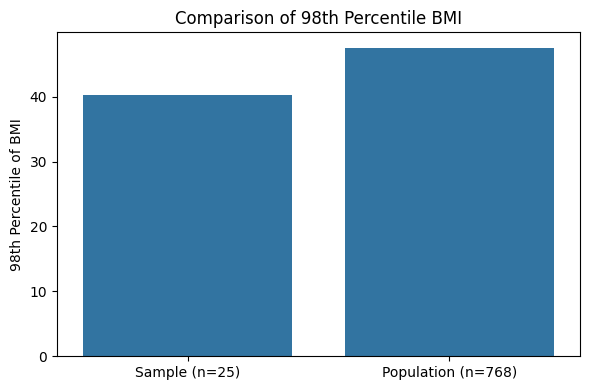

In [3]:
# Part (b) - 98th percentile of BMI
sample_bmi_98 = sample_25["BMI"].quantile(0.98)
population_bmi_98 = df["BMI"].quantile(0.98)

plt.figure(figsize=(6, 4))
sns.barplot(x=["Sample (n=25)", "Population (n=768)"], y=[sample_bmi_98, population_bmi_98])
plt.ylabel("98th Percentile of BMI")
plt.title("Comparison of 98th Percentile BMI")
plt.tight_layout()
plt.savefig("part_b_bmi_percentile.png")
plt.show()

100%|██████████| 500/500 [00:00<00:00, 1143.43it/s]


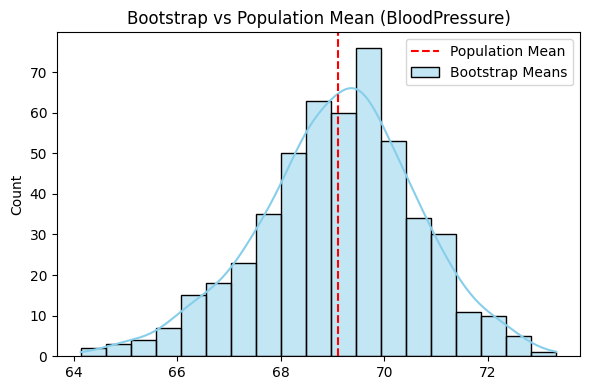

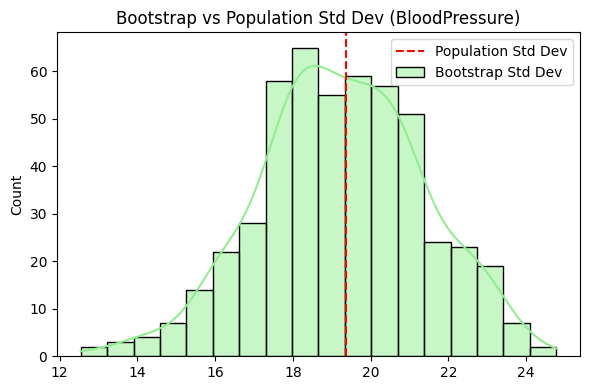

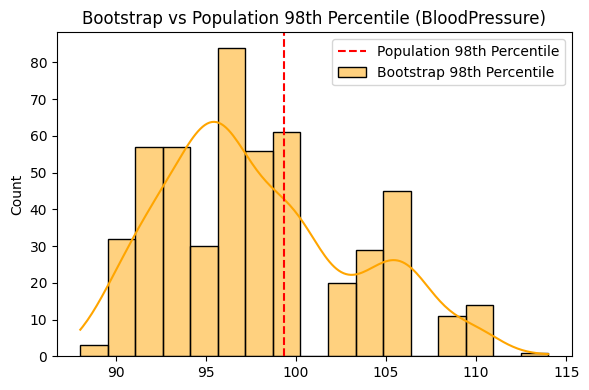

In [2]:
# Part (c) - Bootstrap statistics for BloodPressure
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in tqdm(range(500)):
    sample = df.sample(n=150, replace=True)
    bp = sample["BloodPressure"]
    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_percentiles.append(bp.quantile(0.98))

pop_mean_bp = df["BloodPressure"].mean()
pop_std_bp = df["BloodPressure"].std()
pop_percentile_bp = df["BloodPressure"].quantile(0.98)

# Plot Mean
plt.figure(figsize=(6, 4))
sns.histplot(bootstrap_means, kde=True, color="skyblue", label="Bootstrap Means")
plt.axvline(pop_mean_bp, color='red', linestyle='--', label='Population Mean')
plt.title("Bootstrap vs Population Mean (BloodPressure)")
plt.legend()
plt.tight_layout()
plt.savefig("part_c_bp_mean.png")
plt.show()

# Plot Std Dev
plt.figure(figsize=(6, 4))
sns.histplot(bootstrap_stds, kde=True, color="lightgreen", label="Bootstrap Std Dev")
plt.axvline(pop_std_bp, color='red', linestyle='--', label='Population Std Dev')
plt.title("Bootstrap vs Population Std Dev (BloodPressure)")
plt.legend()
plt.tight_layout()
plt.savefig("part_c_bp_std.png")
plt.show()

# Plot 98th Percentile
plt.figure(figsize=(6, 4))
sns.histplot(bootstrap_percentiles, kde=True, color="orange", label="Bootstrap 98th Percentile")
plt.axvline(pop_percentile_bp, color='red', linestyle='--', label='Population 98th Percentile')
plt.title("Bootstrap vs Population 98th Percentile (BloodPressure)")
plt.legend()
plt.tight_layout()
plt.savefig("part_c_bp_percentile.png")
plt.show()
